In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier,BaggingClassifier

from sklearn.metrics import classification_report

!pip install xgboost
from xgboost import XGBClassifier
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 5.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-runtime-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cudnn-cu12==8.9.2.26; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requ

In [2]:
df = pd.read_csv("Wine.csv")
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [3]:
df['Customer_Segment'].value_counts()

,count
Customer_Segment,
2,71
1,59
3,48


<Axes: xlabel='Customer_Segment', ylabel='count'>

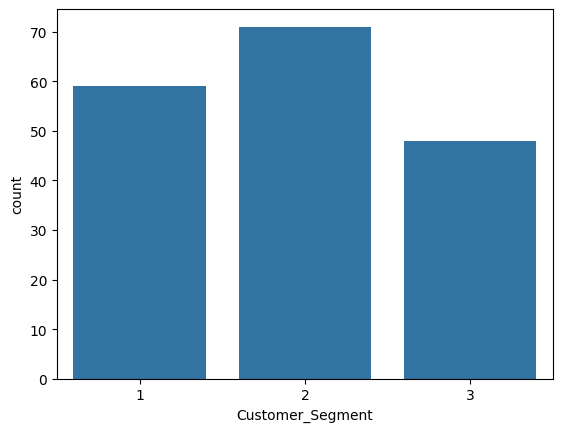

In [4]:
sns.countplot(x=df['Customer_Segment']) # OR
# sns.countplot(y=df['Customer_Segment'])

In [5]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


<Axes: >

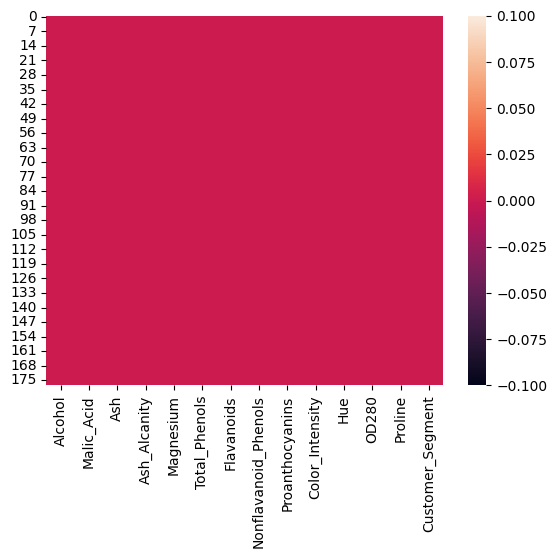

In [6]:
sns.heatmap(df.isna())# to visualise null values. There are no null values

In [7]:
# In Ensemble Methods Feature Scaling is not required as distance calculation is not involved
# Model Building
# Define X and Y
x=df.iloc[:,:-1] # all rows, all columns except last column
y=df['Customer_Segment']

In [8]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=42)

In [9]:
# Build Individual Decision Tree Model
dt=DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
ypred=dt.predict(xtest)
print('Train Accuracy: ',dt.score(xtrain,ytrain))
print('Test Accuracy: ',dt.score(xtest,ytest))

Train Accuracy:  1.0
Test Accuracy:  0.9444444444444444


In [ ]:
# model is overfitted

In [10]:
#Build individual model first. Check whether single model performing well or when we bag, it is performing well.
# Build Individual Logistic Regression Model
lg=LogisticRegression()
lg.fit(xtrain,ytrain)
ypred=lg.predict(xtest)

print('Train Accuracy: ',lg.score(xtrain,ytrain))
print('Test Accuracy: ',lg.score(xtest,ytest))

Train Accuracy:  0.967741935483871
Test Accuracy:  0.9814814814814815


**Avoid Repetitive task of model building by writing user defined function**

# **Write User Defined Function for Model Building**

In [11]:
def prediction(model):
  model.fit(xtrain,ytrain)
  ypred = model.predict(xtest)
  print('Train Accuracy: ',model.score(xtrain,ytrain))
  print('Test Accuracy: ',model.score(xtest,ytest))


In [12]:
prediction(DecisionTreeClassifier())

Train Accuracy:  1.0
Test Accuracy:  0.9444444444444444


In [13]:
prediction(GradientBoostingClassifier())
#Overfitting is there so hypertune max_depth, no.of decision trees, learning rate alpha

Train Accuracy:  1.0
Test Accuracy:  0.9074074074074074


# **Hyperparameter Tuning**

In [14]:
params = {
    'n_estimators' : [90,110,150], # randomly select no. of trees/models
    'learning_rate' : [0.5,0.6,0.7,0.9,1], # alpha between 0 to 1
    'max_depth' : [3,5,7,11]
}

In [15]:
# tuning GradientBoostingClassifier,verbose: print possible combinations or not,
# verbose=1 will not show combinations, it will show direct results
grid = GridSearchCV(GradientBoostingClassifier(),param_grid=params,verbose=1)
grid.fit(xtrain,ytrain)
# Controls the verbosity: the higher, the more messages.
# >1 : the computation time for each fold and parameter candidate is displayed;
# >2 : the score is also displayed;
# >3 : the fold and candidate parameter indexes are also displayed together with the starting time of the computation.

# It is GridSearchCV i.e. kfold cross validation is also done
# by default 5 folds, params: 3 X 5 X 4 = 60 combinations, 60 X 5 = 300 models

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.5, 0.6, 0.7, 0.9, 1],
                         'max_depth': [3, 5, 7, 11],
                         'n_estimators': [90, 110, 150]},
             verbose=1)

In [16]:
grid.best_params_

{'learning_rate': 0.9, 'max_depth': 3, 'n_estimators': 110}

In [17]:
prediction(GradientBoostingClassifier(learning_rate=0.9,max_depth=3,n_estimators=110))

Train Accuracy:  1.0
Test Accuracy:  1.0


In [18]:
df['Customer_Segment'].unique()

array([1, 2, 3])

In [19]:
prediction(XGBClassifier()) # some may get error.
# in target column, Customer_Segment we have class numbers as 1,2,3
#new version requires classification should start from 0. It expects class as 0,1,2

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2], got [1 2 3]

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
y

,Customer_Segment
0,1
1,1
2,1
3,1
4,1
...,...
173,3
174,3
175,3
176,3


In [22]:
le = LabelEncoder()
y = le.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [23]:
ytrain

,Customer_Segment
138,3
104,2
78,2
36,1
93,2
...,...
71,2
106,2
14,1
92,2


In [24]:
prediction(XGBClassifier()) # in ytrain old data is present i.e. 1 2 3 we want 0 1 2

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2], got [1 2 3]

In [25]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=42)

In [26]:
ytrain

array([2, 1, 1, 0, 1, 0, 2, 1, 1, 2, 0, 0, 0, 2, 0, 0, 1, 2, 1, 0, 2, 1,
       0, 2, 1, 1, 0, 1, 0, 0, 1, 0, 0, 2, 1, 1, 1, 0, 1, 1, 1, 2, 2, 0,
       1, 2, 2, 1, 1, 0, 1, 2, 2, 1, 2, 1, 1, 1, 0, 0, 2, 0, 2, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 2, 1, 1, 1, 2, 2, 1, 0, 0, 1, 2, 2, 0, 1, 2,
       2, 2, 2, 1, 0, 1, 0, 2, 0, 0, 1, 0, 0, 2, 1, 0, 2, 2, 0, 0, 2, 2,
       2, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 0, 1, 1])

In [27]:
prediction(XGBClassifier())

Train Accuracy:  1.0
Test Accuracy:  0.9629629629629629


**Perform Hyperparameter Tuning for XGB (learning rate, max_depth,lambda,n_estimators)**

In [28]:
params = {
    'n_estimators' : [90,110,150], # randomly select no. of trees/models
    'learning_rate' : [0.5,0.7,1], # alpha between 0 to 1
    'lambda': [1,2,3],
    'max_depth' : [3,7,11]
}

In [29]:
grid = GridSearchCV(XGBClassifier(),param_grid=params,verbose=1)
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'lambda': [1, 2, 3], 'learning_rate': [0.5, 0.7, 1],
                         'max_depth': [3, 7, 11],
                         'n_estimators': [90, 110, 150]},
             verbose=1)

In [30]:
grid.best_params_

{'lambda': 2, 'learning_rate': 0.5, 'max_depth': 7, 'n_estimators': 90}

In [31]:
prediction(XGBClassifier(reg_lambda=2,learning_rate=0.5,max_depth=7,n_estimators=90))

Train Accuracy:  1.0
Test Accuracy:  0.9814814814814815


# **Stacking**

In [32]:
# create a list of algorithms
models=[]
models.append(('lg',LogisticRegression()))
models.append(('dt',DecisionTreeClassifier()))#default criterion='gini'
models.append(('dt1',DecisionTreeClassifier(criterion='entropy')))

In [33]:
models

[('lg', LogisticRegression()),
 ('dt', DecisionTreeClassifier()),
 ('dt1', DecisionTreeClassifier(criterion='entropy'))]

In [34]:
prediction(StackingClassifier(estimators=models,final_estimator=RandomForestClassifier(max_depth=5)))

Train Accuracy:  0.9919354838709677
Test Accuracy:  0.9629629629629629
